## In-class exercise

We will now try to use a neural network to fit a simple nonlinear function. Suppose that we are trying to learn a scalar relation:

    y = f0(x)
    
where `x` and `y` are scalars. Suppose that the true function is `f0(x) = sin(2*pi*x)`, but the estimator does not know this. We get training data as follows.

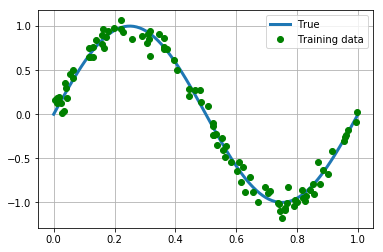

In [1]:
# Synthetic training data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

nsamp = 100
xtr = np.random.rand(nsamp)
ytr = np.sin(2*np.pi*xtr) + np.random.normal(scale=0.1,size=nsamp)

# True function
nplot = 100
xp = np.linspace(0,1,nplot)
yp = np.sin(2*np.pi*xp)

# PLot
plt.plot(xp,yp,linewidth=3)
plt.plot(xtr,ytr,'go')
#plt.axis([0,1,-1.5,1.5])
plt.grid()
plt.legend(['True', 'Training data'])


Now try to have a neural network *learn* the relation `y=f(x)`.
* Clear the keras session
* Create a neural network with 4 hidden units, 1 output unit
* Use a sigmoid activation for the hidden units and a `linear` activation for the output layer
* Compile with `mean_squared_error` for the `loss` and `metrics`
* Fit the model.  You may need to play with the learning rate `lr` and you will probably need many `epochs`.
* Plot the predicted and true function

In [53]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.backend as K

K.clear_session()

In [54]:
nx=1
nin = nx  # dimension of input data
nh = 4    # number of hidden units
nout = 1  # number of outputs = 1 since this is binary
model = Sequential()
model.add(Dense(units=nh, input_shape=(nx,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation='linear', name='output'))

In [55]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 4)                 8         
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [56]:
from tensorflow.keras import optimizers

opt = optimizers.Adam(lr=0.01)
model.compile(optimizer=opt,
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

In [57]:
hist=model.fit(xtr, ytr, epochs=10, batch_size=100, validation_data=(xp,yp))

Train on 100 samples, validate on 100 samples
Epoch 1/10
100/100 [==============================] - 0s 1ms/sample - loss: 0.6289 - mean_squared_error: 0.6289 - val_loss: 0.6430 - val_mean_squared_error: 0.6430
Epoch 2/10
100/100 [==============================] - 0s 30us/sample - loss: 0.6016 - mean_squared_error: 0.6016 - val_loss: 0.6149 - val_mean_squared_error: 0.6149
Epoch 3/10
100/100 [==============================] - 0s 40us/sample - loss: 0.5769 - mean_squared_error: 0.5769 - val_loss: 0.5895 - val_mean_squared_error: 0.5895
Epoch 4/10
100/100 [==============================] - 0s 40us/sample - loss: 0.5548 - mean_squared_error: 0.5548 - val_loss: 0.5666 - val_mean_squared_error: 0.5666
Epoch 5/10
100/100 [==============================] - 0s 40us/sample - loss: 0.5352 - mean_squared_error: 0.5352 - val_loss: 0.5463 - val_mean_squared_error: 0.5463
Epoch 6/10
100/100 [==============================] - 0s 40us/sample - loss: 0.5180 - mean_squared_error: 0.5180 - val_loss: 0.528

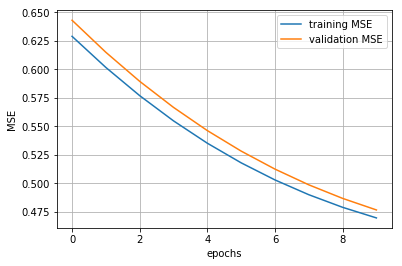

In [61]:
tr_MSE = hist.history['mean_squared_error']
val_MSE = hist.history['val_mean_squared_error']

plt.plot(tr_accuracy)
plt.plot(val_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(['training MSE', 'validation MSE'])